<a href="https://colab.research.google.com/github/vipincsekar/Customer-Review-Analysis/blob/master/Customer_Review_Vipin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("/content/dataset.csv", encoding='ISO-8859-1')

In [0]:
data.head(2)

,subject,Customer,Location,Rating,date_time,Views,Total_reviews_by_customer,Customer_follower
0,Cheaters,ambajirao_a,Bangalore India,1,4/22/2014 17:22,9558,2.0,1
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,3/13/2006 21:41,3548,7.0,6


In [0]:
data.shape

(130, 8)

In [0]:
data["Location"].value_counts()

In [0]:
corr_matrix = data.corr()
corr_matrix["Rating"].sort_values(ascending=False)

Rating                       1.000000
date_timeIs_month_start      0.112877
date_timeIs_quarter_start    0.079190
Total_reviews_by_customer    0.072051
Customer_follower            0.048019
date_timeDayofweek           0.031087
date_timeDay                -0.002436
date_timeMonth              -0.022219
date_timeDayofyear          -0.022562
date_timeWeek               -0.038689
date_timeIs_month_end       -0.048806
date_timeYear               -0.237371
date_timeElapsed            -0.237778
date_timeIs_quarter_end           NaN
date_timeIs_year_end              NaN
date_timeIs_year_start            NaN
Name: Rating, dtype: float64

In [0]:
data["date_time"] =pd.to_datetime(data["date_time"])

In [0]:
def add_datepart1(df, fldname, drop=True, time=False, errors="raise"):	

    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

def is_date(x): return np.issubdtype(x.dtype, np.datetime64)


In [0]:
add_datepart1(data,"date_time")
data.head()


,subject,Customer,Location,Rating,Views,Total_reviews_by_customer,Customer_follower,date_timeYear,date_timeMonth,date_timeWeek,date_timeDay,date_timeDayofweek,date_timeDayofyear,date_timeIs_month_end,date_timeIs_month_start,date_timeIs_quarter_end,date_timeIs_quarter_start,date_timeIs_year_end,date_timeIs_year_start,date_timeElapsed
0,Cheaters,ambajirao_a,Bangalore India,1,9558,2.0,1,2014,4,17,22,1,112,False,False,False,False,False,False,1398187320
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,3548,7.0,6,2006,3,11,13,0,72,False,False,False,False,False,False,1142286060
2,Metlife is the worst insurance company,lijok,Kochi India,1,9311,1.0,0,2013,6,23,4,1,155,False,False,False,False,False,False,1370336880
3,HAVE U MET LIFE TODAY??????,Kiran4,mumbai india,4,15309,15.0,28,2004,10,42,14,3,288,False,False,False,False,False,False,1097762760
4,Irresponsible persons working over there in PNB,srikanthkumar.a,Bengaluru/ Bangalore India,1,3480,1.0,0,2017,5,22,31,2,151,True,False,False,False,False,False,1496259000


In [0]:
data.head(2)

,subject,Customer,Location,Rating,Views,complaint,Total_reviews_by_customer,Customer_follower,date_timeYear,date_timeMonth,...,date_timeDay,date_timeDayofweek,date_timeDayofyear,date_timeIs_month_end,date_timeIs_month_start,date_timeIs_quarter_end,date_timeIs_quarter_start,date_timeIs_year_end,date_timeIs_year_start,date_timeElapsed
0,Cheaters,ambajirao_a,Bangalore India,1,9558 Views,Third class service and they are cheaters. Nev...,2 Reviews,1 Follower,2014,4,...,22,1,112,False,False,False,False,False,False,1398187320
1,"Well, think again!!!!!",deekshasethi,new delhi india,4,3548 Views,Its true that insurance is a services based in...,7 Reviews,6 Followers,2006,3,...,13,0,72,False,False,False,False,False,False,1142286060


In [0]:
from pandas.tools.plotting import scatter_matrix
attributes =["Rating","Views","Total_reviews_by_customer","Customer_follower"]
scatter_matrix(data[attributes], figsize=(12,8))


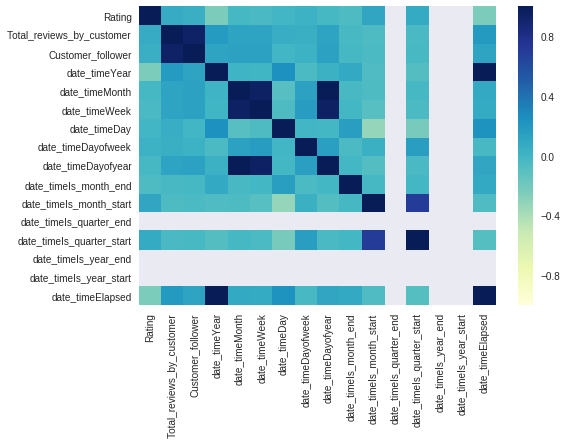

In [0]:
import seaborn as sns
sns.heatmap(data.corr(),cmap='YlGnBu')

**Sentiment Analysis on the attribute "Subject"**

In [0]:
data["class"]=np.zeros([data.shape[0],1])
data["class"].loc[data.Rating>=3]=1
data["class"].head(2)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0    0.0
1    1.0
Name: class, dtype: float64

In [0]:
X = data["subject"]
y = data["class"]

**Training and testing split is performed as 80-20%**

In [71]:
#Train test split
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2)
Xtrain.shape, ytrain.shape, Xval.shape, yval.shape

((104,), (104,), (26,), (26,))

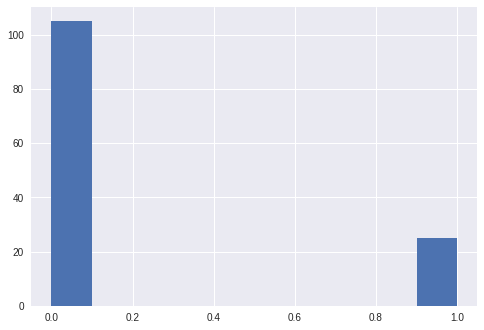

In [0]:
data["class"].hist()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

**The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.**


**Stopword-a word that is automatically omitted from a computer-generated concordance or index.**
**Example : is,the **
**These stopwords are removed from the analysis**

In [0]:
veczr = CountVectorizer(ngram_range=(1,3 ), lowercase = True, stop_words='english')

In [0]:
veczr.fit(Xtrain)
trn_term = veczr.transform(Xtrain)
val_term = veczr.transform(Xval)

**Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables**

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=0.1, dual=True)
model.fit(trn_term, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
prediction = model.predict(trn_term)
prediction_val = model.predict(val_term)
np.sum(prediction==ytrain)/len(ytrain), np.sum(prediction_val==yval)/len(yval)
                                                                       

(0.8076923076923077, 0.8076923076923077)

In [0]:
from sklearn.metrics import confusion_matrix 
confusion_matrix( ytrain, prediction)

array([[84,  0],
       [20,  0]])

**Inference : 84 values are predicted correctly and 20 or not.**

In [0]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=10)

In [0]:
Xt = trn_term.sign()
Xv = val_term.sign()

In [80]:
model_RF.fit(Xt, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
prediction = model_RF.predict(Xt)
prediction_val = model_RF.predict(Xv)

np.sum(prediction==ytrain)/len(ytrain), np.sum(prediction_val==yval)/len(yval)

(0.9903846153846154, 0.6923076923076923)

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap' : [False],'n_estimators': [3,10], 'max_features': [2, 3, 4]}
]

grid_search = GridSearchCV(model_RF, param_grid, cv=5, scoring='accuracy')
grid_search.fit(trn_term, ytrain)

In [87]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 10}

In [0]:
grid_search.cv_results_


In [92]:
prediction = grid_search.predict(Xt)
prediction_val = grid_search.predict(Xv)
np.sum(prediction==ytrain)/len(ytrain), np.sum(prediction_val==yval)/len(yval)
                                                                       

(0.9807692307692307, 0.6923076923076923)